### Dividing a video from the BioVid Heat Pain Dataset into 46 frames

In [1]:
# Montowanie Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
COLAB_ROOT = '/content/drive/MyDrive/PainRecognitionProject/'
VIDEO_SAMPLE_PATH = os.path.join(COLAB_ROOT, 'data/BioVid_HeatPain/071309_w_21', '071309_w_21-BL1-081.mp4')
FRAME_SKIP = 3

In [4]:
cap = cv2.VideoCapture(VIDEO_SAMPLE_PATH)

if not cap.isOpened():
    print(f"ERROR: Could not open video: {VIDEO_SAMPLE_PATH}")
    exit()

total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

print(f"Video Info:")
print(f"  Total frames: {total_frames}")
print(f"  FPS: {fps}")
print(f"  Resolution: {width}x{height}")
print(f"  Duration: {total_frames / fps:.2f} seconds")

cap.release()

Video Info:
  Total frames: 138
  FPS: 25.0
  Resolution: 1388x1038
  Duration: 5.52 seconds


In [5]:
cap = cv2.VideoCapture(VIDEO_SAMPLE_PATH)

frames = []
frame_idx = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    if frame_idx % FRAME_SKIP == 0:
        frames.append(frame)

    frame_idx += 1

cap.release()

print(f"\nExtraction Summary:")
print(f"  Total extracted frames: {len(frames)}")
print(f"  Frame shape: {frames[0].shape}")
print(f"  Reduction: {len(frames) / total_frames * 100:.1f}% of original")


Extraction Summary:
  Total extracted frames: 46
  Frame shape: (1038, 1388, 3)
  Reduction: 33.3% of original


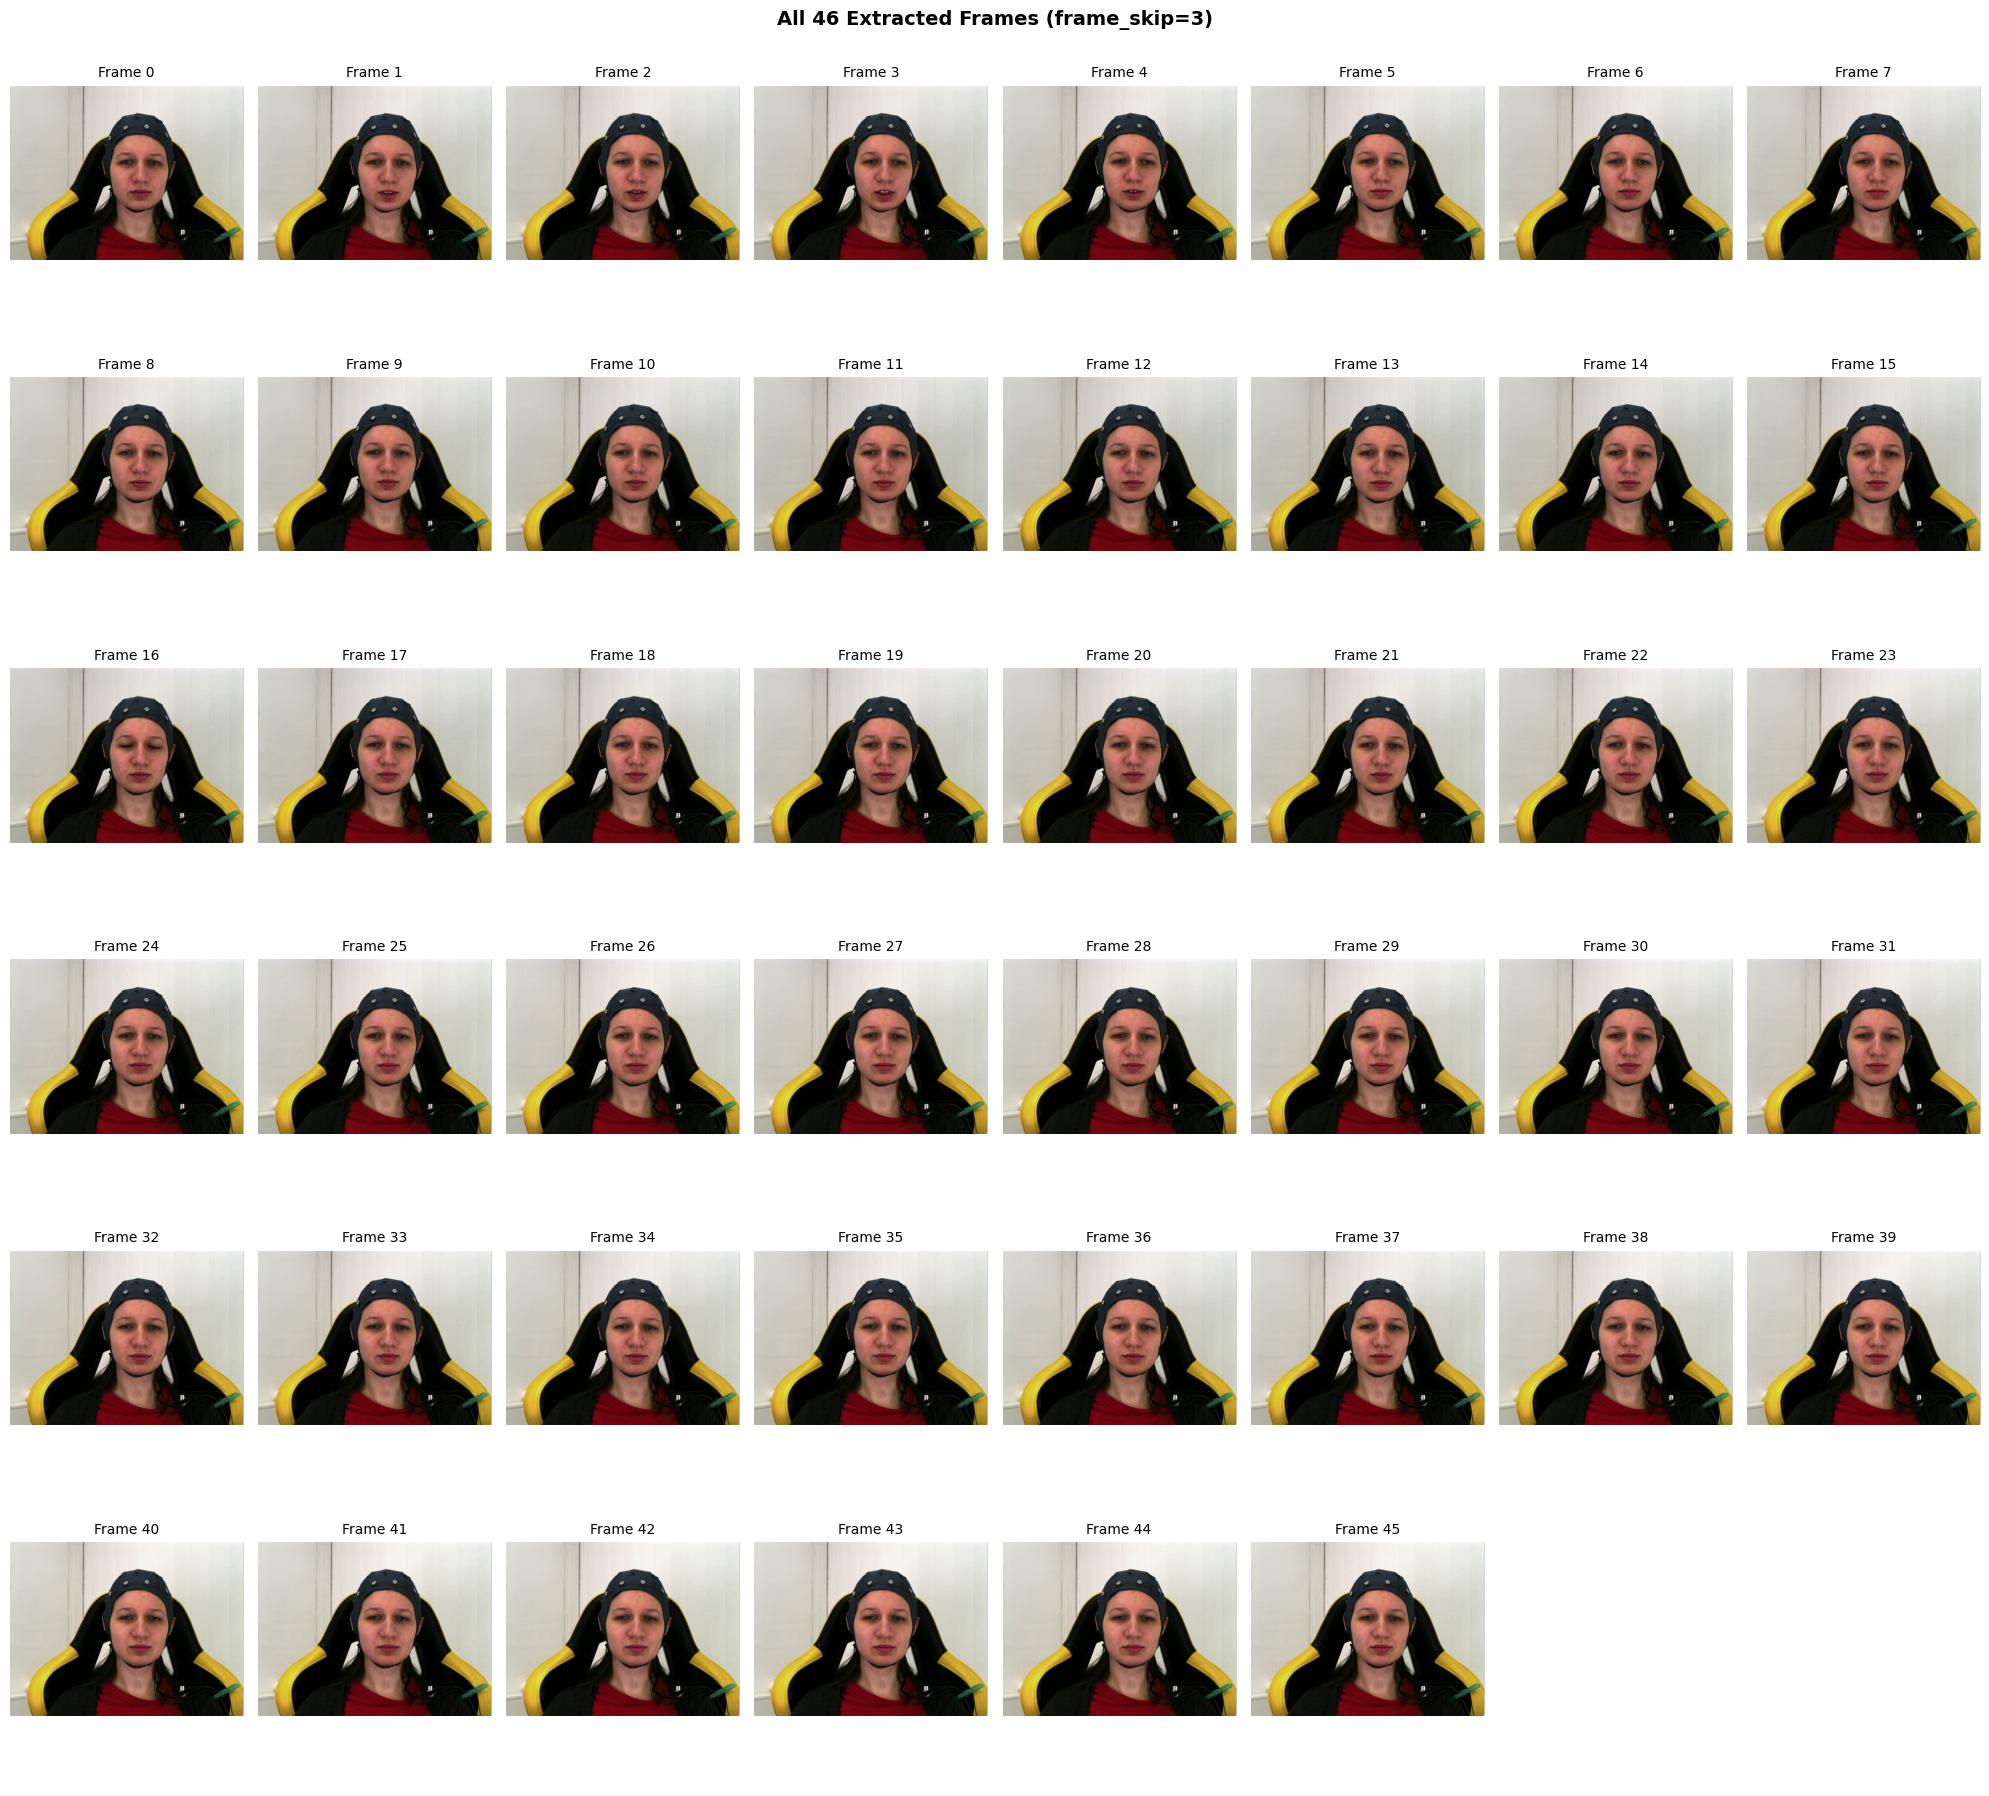


Visualization complete! Displayed 46 frames in a 6x8 grid.


In [6]:
num_frames = len(frames)
cols = 8
rows = (num_frames + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3))
axes = axes.flatten()

for idx, frame_bgr in enumerate(frames):
    frame_rgb = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
    axes[idx].imshow(frame_rgb)
    axes[idx].set_title(f"Frame {idx}", fontsize=10)
    axes[idx].axis('off')

# Hide empty subplots
for idx in range(num_frames, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle(f'All {num_frames} Extracted Frames (frame_skip={FRAME_SKIP})',
             fontsize=14, fontweight='bold', y=0.995)
plt.show()

print(f"\nVisualization complete! Displayed {num_frames} frames in a {rows}x{cols} grid.")